# Analysis of Chess Data

Import libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

Read in dataframe

In [26]:
# Try opening data/game_list.csv and reading first 3 lines
with open('data/game_list.csv', 'r') as fp:
    for x in range(3):
        line = fp.readline()
        x = line.split(',')
        print(x[-7:])

['white', 'black', 'eco', 'whiteElo', 'blackElo', 'moves', 'result\n']
['Remmler', ' Michael', 'A40', '2192', '0', '1. d4 g6 2. c4 Nh6 3. Nc3 d6 4. h4 e6 5. Nf3 f6 6. e4 Nf7 7. Be3 Bg7 8. Qd2 Nd7 9. g3 O-O 10. Bh3 Re8 11. O-O Nf8 12. Bg2 c6 13. Ne1 Nd7 14. Nd3 Nb6 15. b3 Nd7 16. Rac1 Qe7 17. d5 exd5 18. cxd5 c5 19. f4 b6 20. Nb5 Nf8 21. Rce1 Qd7 22. Nc3 Ba6 23. Rf2 Re7 24. Kh2 Rae8 25. Bh3 f5 26. exf5 gxf5 27. Rfe2 Nh6 28. Qc2 Qb7 29. Bf2 Rxe2 30. Rxe2 Rxe2 31. Nxe2 Qxd5 32. Ne1 Ng4+ 33. Bxg4 fxg4 34. Nc3 Bxc3 35. Qxc3 Bb7 36. Qc4 Qxc4 37. bxc4 Ba6 38. Nc2 Bxc4 39. a3 h5 40. Be3 Kf7 41. Kg2 d5 42. Kf2 Ke6 43. Bc1 d4 44. Bd2 Nd7 45. Ke1 Nf6 46. f5+ Kxf5 47. Bf4 Ke4 48. Kd2 Nd5 49. Bb8 a6 50. Ne1 Bb5 51. Ng2 c4 52. Nf4 c3+ 53. Kc1 d3', '0-1\n']
['Garista', ' Eugenio', 'A45', '1961', '1959', '1. d4 Nf6 2. Bf4 c5 3. d5 Qb6 4. Be5 d6 5. Bxf6 gxf6 6. Qc1 Bh6 7. e3 f5 8. Nd2 Nd7 9. Nc4 Qc7 10. a4 Nb6 11. Qd1 Rg8 12. Qh5 Rg6 13. Nf3 Nxd5 14. Nh4 Nf6 15. Qf3 Rg5 16. Nd2 e5 17. Bb5+ Kf8 18. e4 R

Create a formatted CSV file to turn into a Pandas dataframe

In [3]:
'''
with open('data/game_list.csv', 'r') as fp:
    with open('data/game_strip.csv', 'w') as newcsv:
        writer = csv.writer(newcsv, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        line = fp.readline()
        while line:
            x = line.split(',')
            writer.writerow(x[-7:])
            line = fp.readline()
'''
print("Skip this step, CSV file already created")

Skip this step, CSV file already created


In [4]:
df = pd.read_csv('data/game_strip.csv')
df.head()

,white,black,eco,whiteElo,blackElo,moves,result
0,Remmler,Michael,A40,2192,0,1. d4 g6 2. c4 Nh6 3. Nc3 d6 4. h4 e6 5. Nf3 f...,0-1\n
1,Garista,Eugenio,A45,1961,1959,1. d4 Nf6 2. Bf4 c5 3. d5 Qb6 4. Be5 d6 5. Bxf...,0-1\n
2,Eydsteinsson,Silas,B90,1488,1763,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,1/2-1/2\n
3,Alkaersig,Ole,B07,0,0,1. e4 d6 2. d4 Nf6 3. Nc3 g6 4. Be2 Bg7 5. h4 ...,0-1\n
4,Kononenko,Tatiana,A40,2095,2255,1. d4 e6 2. e4 d5 3. exd5 exd5 4. Bd3 Nc6 5. c...,1/2-1/2\n


Looking at ELO values, some need to be filtered out

In [5]:
df.sort_values(['blackElo'],ascending=False).head()

,white,black,eco,whiteElo,blackElo,moves,result
1736851,Kasperek,Joanna,A02,-12865,32669,1. f4 c5 2. Nf3 Nf6 3. g3 d5 4. Bg2 Nc6 5. O-O...,1-0\n
1956896,Zezulkin,Alina,B33,0,32429,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,0-1\n
3538039,Kowalewska,Agata,A40,0,32429,1. d4 g6 2. e4 Bg7 3. Nf3 b6 4. c4 Bb7 5. Nc3 ...,1/2-1/2\n
249192,Kichigin,Viktor,D07,24802,32263,1. d4 d5 2. c4 Nc6 3. cxd5 Qxd5 4. e3 e5 5. Nc...,0-1\n
3573332,Kashin,Yury,A46,-24447,32263,1. d4 Nf6 2. Nf3 e6 3. c4 b6 4. g3 Ba6 5. Nbd2...,1-0\n


In [6]:
df.sort_values(['whiteElo'],ascending=False).head()

,white,black,eco,whiteElo,blackElo,moves,result
2826159,Grabczynski,Zdzislaw,C34,32604,1801,1. e4 e5 2. f4 exf4 3. Nf3 d6 4. d4 Bg4 5. Bxf...,1-0\n
941131,Jasinska-Kuzia,Lidia,A40,32604,17790,1. d4 b6 2. c4 Bb7 3. Nc3 e6 4. e3 d5 5. Nf3 N...,1-0\n
2913100,Kowalczyk,Henryk,B20,32474,1791,1. e4 c5 2. Be2 Nc6 3. Nf3 Nf6 4. d3 e6 5. c3 ...,0-1\n
2567373,Andersen,Rune,D15,32377,12977,1. d4 d5 2. c4 c6 3. Nf3 Nf6 4. Nc3 e6 5. Bg5 ...,1-0\n
4855660,Lapaj,Mateusz,C00,31984,1752,1. e4 e6 2. Nc3 d5 3. exd5 exd5 4. Qe2+ Be7 5....,0-1\n


Split stats up by opening 4 moves

In [7]:
w_stats = {}
b_stats = {}

for index,row in df.iterrows():
    w_elo = row['whiteElo']
    b_elo = row['blackElo']
    
    # If elo is impossibly high or low, skip
    if int(w_elo) < 1 or int(b_elo) < 1 or int(w_elo) > 2882 or int(b_elo) > 2882:
        continue
    
    win = row['result\n']
    w_win = np.array([0,0,1])
    b_win = np.array([0,0,1])
    if win == "1-0\n":
        w_win += np.array([1,0,0])
    elif win == "0-1\n":
        b_win += np.array([1,0,0])
    elif win == "1/2-1/2\n":
        w_win += np.array([0,1,0])
        b_win += np.array([0,1,0])
    else:
        # If unknown result, skip game
        continue
    moves = row['moves']
    try:
        ind = moves.split(' ')
    except:
        # Error breaking up moves
        continue
    # Break up moves
    w_moves = []
    b_moves = []
    for x,y in zip(ind,range(len(ind))):
        if y%3 == 0:
            continue
        elif y%3 == 1:
            w_moves.append(x)
        elif y%3 == 2:
            b_moves.append(x)
    # Only look at first 4 moves, if less than 4, skip
    if len(w_moves) < 4 or len(b_moves) < 4:
        continue
    w_moves = w_moves[:4]
    b_moves = b_moves[:4]
    w_key = "-".join(w_moves)
    b_key = "-".join(b_moves)
    if w_key in w_stats:
        w_stats[w_key] += w_win
    else:
        w_stats[w_key] = w_win
    if b_key in b_stats:
        b_stats[b_key] += b_win
    else:
        b_stats[b_key] = b_win

In [8]:
# Define common openings for white and black
sicilian_defense_w = "e4-Nf3-d4-Nxd4"
sicilian_defense_b = "c5-d6-cxd4-Nf6"
ruy_lopez_w = "e4-Nf3-Bb5-Ba4"
ruy_lopez_b = "e5-Nc6-a6-Nf6"
king_indian_def_w = "d4-c4-Nc3-e4"
king_indian_def_b = "Nf6-g6-Bg7-d6"
queen_gambit_w = "?-c4-Nc3-Bg5"
queen_gambit_b = "d5-e6-Nf6-Be7"
king_indian_att_w = "Nf3-g3-Bg2-O-O"
king_indian_att_b = "d5-Nf6-c6-Bg4"

white_moves = [sicilian_defense_w, ruy_lopez_w, king_indian_def_w, queen_gambit_w, king_indian_att_w]
black_moves = [sicilian_defense_b, ruy_lopez_b, king_indian_def_b, queen_gambit_b, king_indian_att_b]
move_names = ['Sicialian Defense','Ruy Lopez', 'King\'s Indian Defence', 'Queen\'s Gambit Declined', 'King\'s Indian Attack']

w_moves_dict = dict(zip(white_moves, move_names))
b_moves_dict = dict(zip(black_moves, move_names))


In [9]:
w = pd.DataFrame.from_dict(w_stats).transpose()
w.columns = ['wins','draws','total']
b = pd.DataFrame.from_dict(b_stats).transpose()
b.columns = ['wins','draws','total']
w['loses'] = w['total'] - (w['wins'] + w['draws'])
b['loses'] = b['total'] - (b['wins'] + b['draws'])
w = w[['wins','draws','loses','total']]
b = b[['wins','draws','loses','total']]
w.rename(index=w_moves_dict, inplace=True)
b.rename(index=b_moves_dict, inplace=True)

In [10]:
# Most common openings (white)
w.sort_values(['total'], ascending=False).head(10)

,wins,draws,loses,total
Sicialian Defense,176829,138798,160323,475950
King's Indian Defence,46400,32276,32781,111457
Ruy Lopez,38830,36888,26321,102039
d4-c4-Nf3-Nc3,32439,31472,20895,84806
d4-c4-Nc3-Nf3,31248,26421,23244,80913
d4-Nf3-c4-Nc3,27424,23112,19304,69840
d4-c4-Nc3-e3,23849,23263,19093,66205
d4-c4-Nc3-cxd5,23080,20118,14210,57408
d4-c4-Nf3-g3,20758,21705,13143,55606
King's Indian Attack,20803,19562,14660,55025


In [11]:
# Most common openings (black)
b.sort_values(['total'], ascending=False).head(10)

,wins,draws,loses,total
Sicialian Defense,63290,52423,71819,187532
Nf6-g6-Bg7-O-O,38889,42592,47096,128577
King's Indian Defence,36575,37377,53135,127087
Ruy Lopez,22589,33007,33250,88846
c5-Nc6-g6-Bg7,23845,19950,21127,64922
c5-Nc6-cxd4-Nf6,19486,18941,21484,59911
c5-e6-cxd4-a6,19904,15004,19001,53909
Nf6-e6-b6-Bb7,12454,17581,16761,46796
e6-d5-Nf6-Nfd7,12840,12689,19227,44756
d5-c6-Nf6-e6,9229,13782,17049,40060


In [12]:
# Openings with largest total draws
w.sort_values(['draws'], ascending=False).head(10)

,wins,draws,loses,total
Sicialian Defense,176829,138798,160323,475950
Ruy Lopez,38830,36888,26321,102039
King's Indian Defence,46400,32276,32781,111457
d4-c4-Nf3-Nc3,32439,31472,20895,84806
d4-c4-Nc3-Nf3,31248,26421,23244,80913
d4-c4-Nc3-e3,23849,23263,19093,66205
d4-Nf3-c4-Nc3,27424,23112,19304,69840
d4-c4-Nf3-g3,20758,21705,13143,55606
d4-c4-Nc3-cxd5,23080,20118,14210,57408
King's Indian Attack,20803,19562,14660,55025


In [13]:
# Out of the 100 most common openings, which have the highest win percent?
w_dropped = w.sort_values(['total'], ascending=False).head(100)
w_dropped['win-prop'] = w_dropped.apply(lambda row: row.wins / row.total, axis = 1)
w_dropped.sort_values(['win-prop'], ascending=False).head(20)

,wins,draws,loses,total,win-prop
e4-Nf3-Bc4-Ng5,3158,1241,2532,6931,0.455634
d4-c4-dxe5-Nf3,3230,1758,2140,7128,0.453143
Nf3-c4-Nc3-e4,5021,3609,2581,11211,0.447864
e4-Nf3-c3-d4,3699,2237,2328,8264,0.447604
e4-d4-Nd2-e5,11602,7283,7114,25999,0.446248
e4-d4-Nc3-Be3,9008,5169,6666,20843,0.432183
e4-Nf3-d4-Bc4,5001,2732,3882,11615,0.430564
d4-c4-Nf3-Nbd2,3528,2886,1796,8210,0.429720
e4-Nf3-Bb5-Nc3,2989,2084,1922,6995,0.427305
e4-d4-Nc3-f4,9922,6227,7094,23243,0.426881


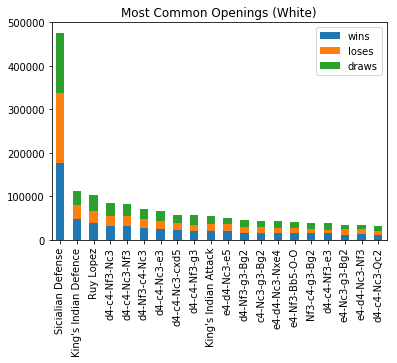

In [14]:
# Visualize data - If an opening is common, tag it
most_common = w.sort_values(['total'], ascending=False).head(20)
#most_common.index.name = 'opening'
#most_common.reset_index(inplace=True)
most_common['loses'] = most_common['total'] - (most_common['wins'] + most_common['draws'])
most_common = most_common[['wins','loses','draws']]
most_common.plot.bar(stacked=True, title='Most Common Openings (White)')

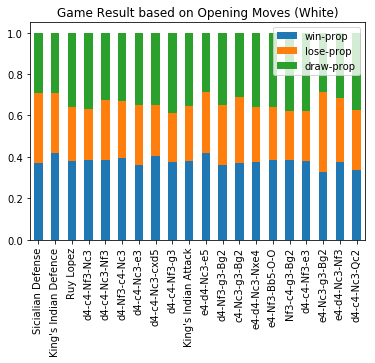

In [15]:
most_common = w.sort_values(['total'], ascending=False).head(20)
#most_common.sort_index(ascending=False, inplace=True)
most_common['win-prop'] = most_common['wins'] / most_common['total']
most_common['lose-prop'] = most_common['loses'] / most_common['total']
most_common['draw-prop'] = most_common['draws'] / most_common['total']
most_common = most_common[['win-prop','lose-prop','draw-prop']]
most_common.plot.bar(stacked=True, title='Game Result based on Opening Moves (White)')

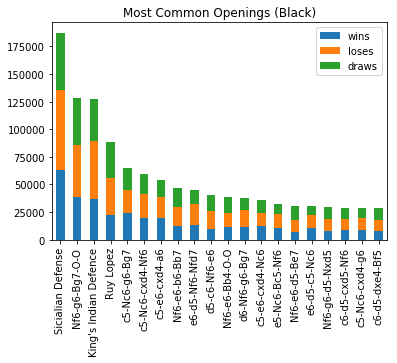

In [16]:
# Visualize data - If an opening is common, tag it
most_common = b.sort_values(['total'], ascending=False).head(20)
#most_common.index.name = 'opening'
#most_common.reset_index(inplace=True)
most_common['loses'] = most_common['total'] - (most_common['wins'] + most_common['draws'])
most_common = most_common[['wins','loses','draws']]
most_common.plot.bar(stacked=True, title='Most Common Openings (Black)')

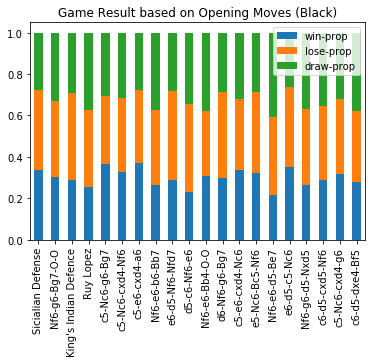

In [17]:
most_common = b.sort_values(['total'], ascending=False).head(20)
#most_common.sort_index(ascending=False, inplace=True)
most_common['win-prop'] = most_common['wins'] / most_common['total']
most_common['lose-prop'] = most_common['loses'] / most_common['total']
most_common['draw-prop'] = most_common['draws'] / most_common['total']
most_common = most_common[['win-prop','lose-prop','draw-prop']]
most_common.plot.bar(stacked=True, title='Game Result based on Opening Moves (Black)')

In [18]:
# Compare game length to elo difference
# X-axis will be the elo difference
# Y-axis will be the length of the game
# Color will be white wins/black wins/draw

scatter_x = []
scatter_y = []
scatter_col = []

for index,row in df.iterrows():
    w_elo = row['whiteElo']
    b_elo = row['blackElo']
    
    # If elo is impossibly high or low
    if int(w_elo) < 1 or int(b_elo) < 1 or int(w_elo) > 2882 or int(b_elo) > 2882:
        continue
    elo_dif = int(w_elo) - int(b_elo)
    
    moves = row['moves']
    try:
        ind = moves.split(' ')
    except:
        # Error breaking up moves
        continue
    game_len = len(ind) // 3
    
    win = row['result\n']
    if win == "1-0\n":
        scatter_col.append('r')
    elif win == "0-1\n":
        scatter_col.append('g')
    elif win == "1/2-1/2\n":
        scatter_col.append('b')
    else:
        continue
    scatter_x.append(elo_dif)
    scatter_y.append(game_len)


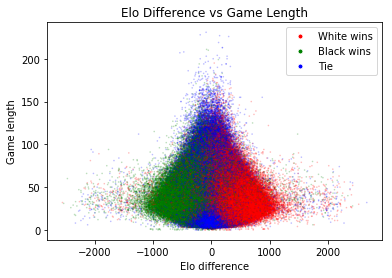

In [19]:
# Bucket data because there are too many individual points
# newDF = pd.DataFrame({'elo-dif':scatter_x, 'game-len':scatter_y, 'color':scatter_col})
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.set_title('Elo Difference vs Game Length')
ax1.set_xlabel('Elo difference')
ax1.set_ylabel('Game length')
leg_help = [Line2D([0], [0], marker='o', color='w', label='White wins', markerfacecolor='r', markersize=5), Line2D([0], [0], marker='o', color='w', label='Black wins', markerfacecolor='g', markersize=5), Line2D([0], [0], marker='o', color='w', label='Tie', markerfacecolor='b', markersize=5)]
ax1.legend(handles=leg_help)
ax1.scatter(scatter_x, scatter_y, color=scatter_col, alpha=.2, s=.5)

In [20]:
# See if difference between GM and non GM

w_gm = {}
w_ngm = {}
b_gm = {}
b_ngm = {}

for index,row in df.iterrows():
    w_elo = row['whiteElo']
    b_elo = row['blackElo']
    
    # If elo is impossibly high or low
    if int(w_elo) < 1 or int(b_elo) < 1 or int(w_elo) > 2882 or int(b_elo) > 2882:
        continue
        
    win = row['result\n']
    w_win = np.array([0,0,1])
    b_win = np.array([0,0,1])
    if win == "1-0\n":
        w_win += np.array([1,0,0])
    elif win == "0-1\n":
        b_win += np.array([1,0,0])
    elif win == "1/2-1/2\n":
        w_win += np.array([0,1,0])
        b_win += np.array([0,1,0])
    else:
        # If unknown result, skip game
        continue
    moves = row['moves']
    try:
        ind = moves.split(' ')
    except:
        # Error breaking up moves
        continue
    # Break up moves
    w_moves = []
    b_moves = []
    for x,y in zip(ind,range(len(ind))):
        if y%3 == 0:
            continue
        elif y%3 == 1:
            w_moves.append(x)
        elif y%3 == 2:
            b_moves.append(x)
    # Only look at first 4 moves, if less than 4, skip
    if len(w_moves) < 4 or len(b_moves) < 4:
        continue
    w_moves = w_moves[:4]
    b_moves = b_moves[:4]
    w_key = "-".join(w_moves)
    b_key = "-".join(b_moves)
        
    # If a grand master game, seperate from rest of data
    if w_elo > 2700 and b_elo > 2700:
        if w_key in w_gm:
            w_gm[w_key] += w_win
        else:
            w_gm[w_key] = w_win
        if b_key in b_gm:
            b_gm[b_key] += b_win
        else:
            b_gm[b_key] = b_win
    else:
        if w_key in w_ngm:
            w_ngm[w_key] += w_win
        else:
            w_ngm[w_key] = w_win
        if b_key in b_ngm:
            b_ngm[b_key] += b_win
        else:
            b_ngm[b_key] = b_win

In [21]:
w_gm = pd.DataFrame.from_dict(w_gm).transpose()
w_gm.columns = ['wins','draws','total']
b_gm = pd.DataFrame.from_dict(b_gm).transpose()
b_gm.columns = ['wins','draws','total']
w_gm['loses'] = w_gm['total'] - (w_gm['wins'] + w_gm['draws'])
b_gm['loses'] = b_gm['total'] - (b_gm['wins'] + b_gm['draws'])
w_gm = w_gm[['wins','draws','loses','total']]
b_gm = b_gm[['wins','draws','loses','total']]
w_gm.rename(index=w_moves_dict, inplace=True)
b_gm.rename(index=b_moves_dict, inplace=True)

w_gm.sort_values(['total'], ascending=False).head(10)

,wins,draws,loses,total
Sicialian Defense,531,883,349,1763
Ruy Lopez,337,702,199,1238
d4-c4-Nf3-Nc3,289,687,175,1151
d4-c4-Nf3-g3,179,414,92,685
e4-Nf3-Bb5-O-O,130,413,87,630
d4-c4-Nc3-Nf3,147,282,106,535
e4-Nf3-Nxe5-Nf3,113,293,53,459
e4-Nf3-Bb5-d3,127,235,79,441
d4-c4-Nc3-e3,99,199,78,376
d4-c4-Nc3-cxd5,109,195,67,371


In [22]:
b_gm.sort_values(['total'], ascending=False).head(10)

,wins,draws,loses,total
Ruy Lopez,185,672,310,1167
Sicialian Defense,222,471,299,992
Nf6-e6-d5-Be7,68,362,98,528
e5-Nc6-Nf6-Nxe4,57,356,97,510
e5-Nf6-d6-Nxe4,55,303,115,473
e5-Nc6-Nf6-Bc5,77,229,123,429
e5-Nc6-Bc5-Nf6,81,235,104,420
Nf6-g6-d5-Nxd5,60,206,104,370
Nf6-e6-Bb4-O-O,62,205,102,369
Nf6-g6-Bg7-O-O,74,160,106,340


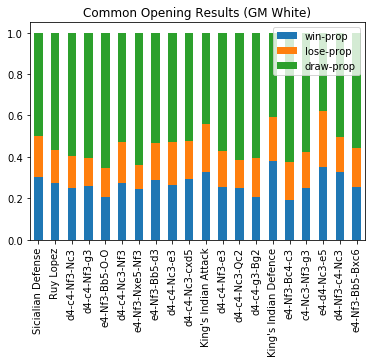

In [23]:
most_common = w_gm.sort_values(['total'], ascending=False).head(20)
#most_common.sort_index(ascending=False, inplace=True)
most_common['win-prop'] = most_common['wins'] / most_common['total']
most_common['lose-prop'] = most_common['loses'] / most_common['total']
most_common['draw-prop'] = most_common['draws'] / most_common['total']
most_common = most_common[['win-prop','lose-prop','draw-prop']]

most_common.plot.bar(stacked=True, title='Common Opening Results (GM White)')

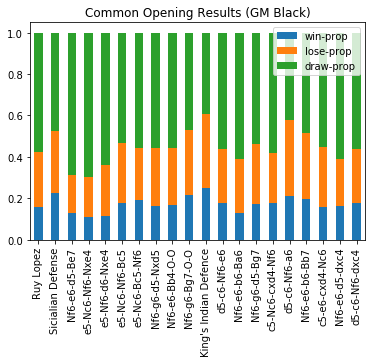

In [24]:
most_common = b_gm.sort_values(['total'], ascending=False).head(20)
#most_common.sort_index(ascending=False, inplace=True)
most_common['win-prop'] = most_common['wins'] / most_common['total']
most_common['lose-prop'] = most_common['loses'] / most_common['total']
most_common['draw-prop'] = most_common['draws'] / most_common['total']
most_common = most_common[['win-prop','lose-prop','draw-prop']]

most_common.plot.bar(stacked=True, title='Common Opening Results (GM Black)')